## Spotify Song-Album Popularity EDA

This notebook performs exploratory data analysis on the Spotify data.

In [149]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', 25)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics

from tqdm import tqdm_notebook

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import statsmodels.api as sm
from statsmodels.api import OLS

from pandas.plotting import scatter_matrix
from collections import Counter

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

In [105]:
# Load data
data = pd.read_csv('data/full_eda_data.csv')

In [106]:
data.head()

,track_id,album_id,track_number,track_count,duration,explicit,track_pop,album_pop,comparative_pop,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0UaMYEvWZi0ZqiDOoHU3YI,6vV5UrXcfyQD1wu4Qo2I9K,4,16,226863,1,68.0,59.0,9.600000,0.904,0.813,-7.105,0.1210,0.03110,0.006970,0.0471,0.810,125.461
1,6I9VzXrHxO9rA9A5euc8Ak,0z7pVBGOD7HCIB7S8eLkLI,6,13,198800,0,79.0,71.0,8.666667,0.774,0.838,-3.914,0.1140,0.02490,0.025000,0.2420,0.924,143.040
2,0WqIKmW4BTrj3eJFmnCKMv,25hVFAxTlDvXbx2X2QkUkE,1,16,235933,0,30.0,23.0,7.466667,0.664,0.758,-6.583,0.2100,0.00238,0.000000,0.0598,0.701,99.259
3,1AWQoqb9bSvzTjaLralEkT,6QPkyl04rXwTGlGlcYaRoW,6,13,267266,0,73.0,72.0,1.083333,0.891,0.714,-6.055,0.1400,0.20200,0.000234,0.0521,0.818,100.972
4,1lzr43nnXAijIGYnCT8M8H,6NmFmPX56pcLBOFMhIiKvF,3,15,227600,0,16.0,10.0,6.428571,0.853,0.606,-4.596,0.0713,0.05610,0.000000,0.3130,0.654,94.759


In [107]:
data.describe()

,track_number,track_count,duration,explicit,track_pop,album_pop,comparative_pop,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,37664.000000,37664.000000,3.766400e+04,37664.000000,37664.000000,37664.000000,37664.000000,37664.000000,37664.000000,37664.000000,37664.000000,37664.000000,37664.000000,37664.000000,37664.000000,37664.000000
mean,6.663711,15.666206,2.369988e+05,0.159277,34.864698,40.158109,-5.673339,0.570488,0.625824,-7.935757,0.085231,0.278914,0.094988,0.201878,0.484566,121.175226
std,6.166289,11.259958,8.627021e+04,0.365939,22.656980,23.532262,10.351069,0.169621,0.230959,4.178623,0.094272,0.305760,0.245524,0.176620,0.251828,29.494036
min,1.000000,3.000000,4.000000e+03,0.000000,0.000000,0.000000,-78.947368,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,11.000000,1.951600e+05,0.000000,15.000000,22.000000,-12.923077,0.459000,0.468000,-9.660000,0.034100,0.022700,0.000000,0.096900,0.282000,97.859750
50%,5.000000,13.000000,2.268195e+05,0.000000,38.000000,45.000000,-3.333333,0.579000,0.658000,-6.924500,0.045800,0.142000,0.000012,0.128000,0.474000,120.013000
75%,9.000000,16.000000,2.651755e+05,0.000000,53.000000,59.000000,1.111111,0.693000,0.814000,-5.154000,0.086000,0.484000,0.004410,0.254000,0.686000,140.006250
max,135.000000,349.000000,7.211978e+06,1.000000,88.000000,89.000000,12.500000,0.986000,1.000000,2.766000,0.955000,0.996000,0.996000,1.000000,1.000000,222.133000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1e927d10>,
      dtype=object)

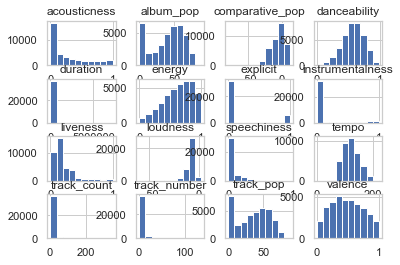

In [108]:
data.hist()

In [5]:
data.describe()

,track_number,track_count,duration,track_pop,comparative_pop,danceability,energy,loudness,speechiness,acousticness,liveness,valence
count,40415.000000,40415.000000,4.041500e+04,40415.000000,40415.000000,40415.000000,40415.000000,40415.000000,40415.000000,40415.000000,40415.000000,40415.000000
mean,9.129902,14.358511,2.208703e+05,32.537767,-5.282625,0.545371,0.101695,-7.389449,8.455385,1.220592,0.586926,3.139018
std,12.611353,12.209903,1.024597e+05,23.506694,10.096814,0.193047,2.151203,4.512736,31.837571,4.029411,1.895489,11.693014
min,0.000000,-63.800000,0.000000e+00,0.000000,-78.947368,0.000000,-30.016000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,11.000000,1.861530e+05,7.000000,-12.000000,0.429000,0.415000,-9.382500,0.034700,0.027200,0.099100,0.291000
50%,6.000000,13.000000,2.222530e+05,36.000000,-2.181818,0.565000,0.633000,-6.648000,0.048600,0.174000,0.137000,0.498000
75%,10.000000,16.000000,2.612595e+05,52.000000,1.076923,0.685000,0.803000,-4.753000,0.112000,0.605000,0.304000,0.732000
max,135.000000,349.000000,7.211978e+06,88.000000,12.500000,0.987000,1.000000,2.766000,211.261000,100.000000,54.000000,88.000000


In [123]:
predictors = ['track_number', 'track_count', 'duration', 'explicit', 
              'danceability', 'energy', 'loudness', 'speechiness', 
              'acousticness', 'instrumentalness', 'liveness', 
              'valence', 'tempo']
response = 'comparative_pop'

In [131]:
# Split into train and test sets
np.random.seed(109)

X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != response], 
                                                         data[response], test_size=0.2, 
                                                         random_state = 109)

In [133]:
# Plot the predictors' distributions
def spotify_hist(data, predictor):
    sns.distplot(data[predictor], kde=False, label=predictor)

    plt.title(f"The Distribution of The Predictor: {predictor}")
    plt.legend()
    plt.ylabel('count')
    plt.show()

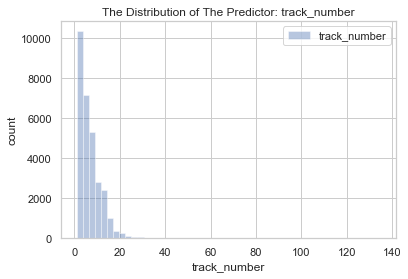

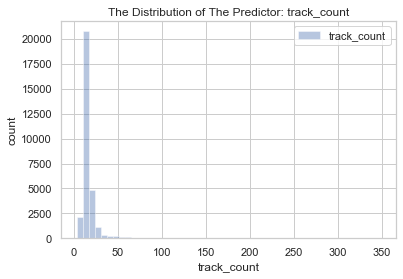

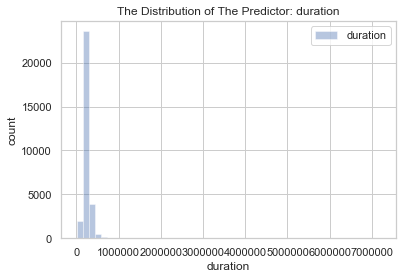

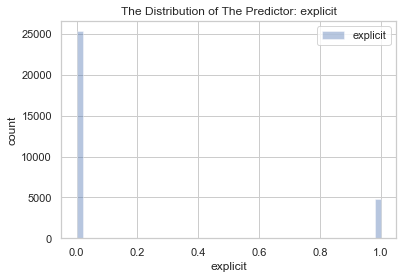

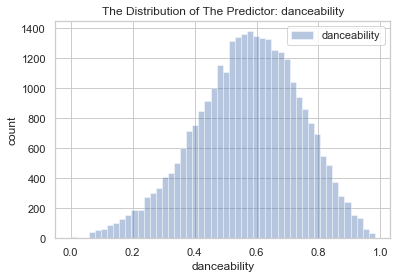

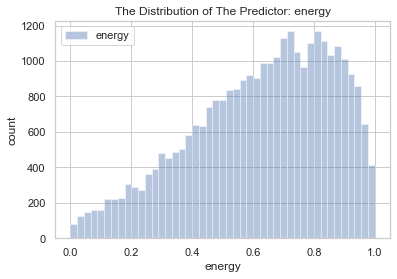

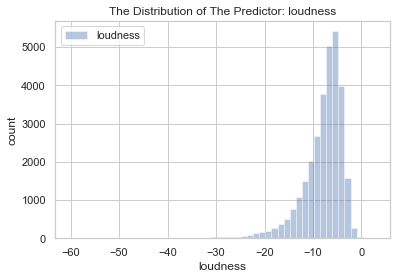

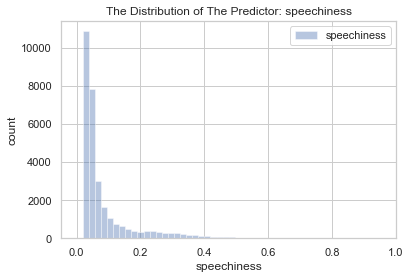

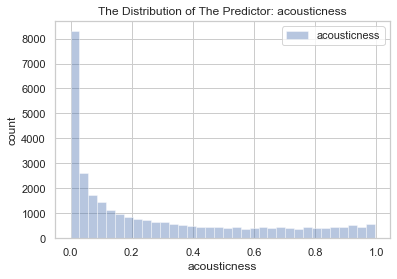

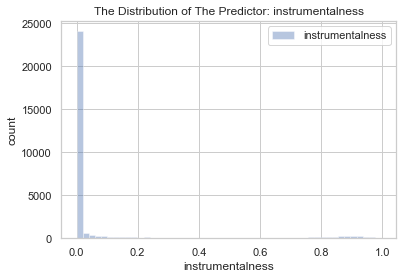

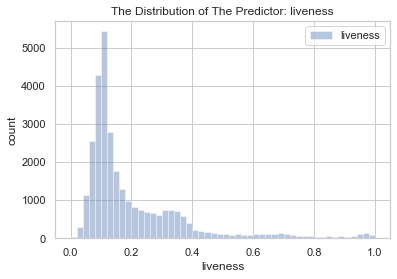

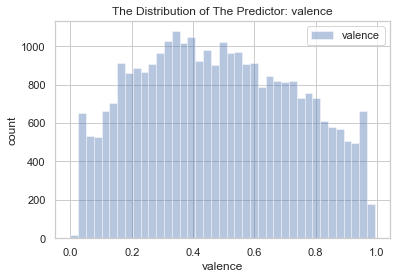

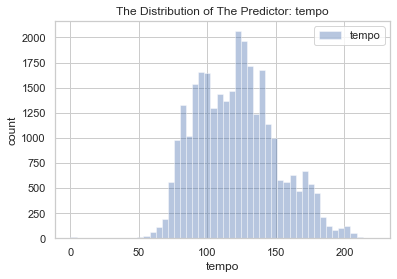

In [134]:
for predictor in predictors:
    spotify_hist(X_train, predictor)

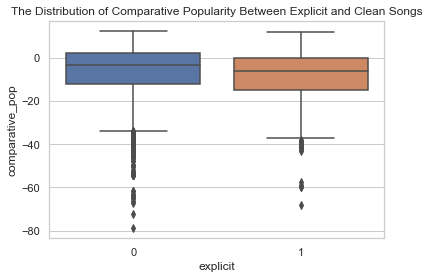

In [138]:
# Plot the difference in `comparative_pop` between explicit and clean songs
ax = sns.boxplot(x='explicit', y='comparative_pop', data=data)

ax.set_title('The Distribution of Comparative Popularity Between Explicit and Clean Songs')
plt.show()

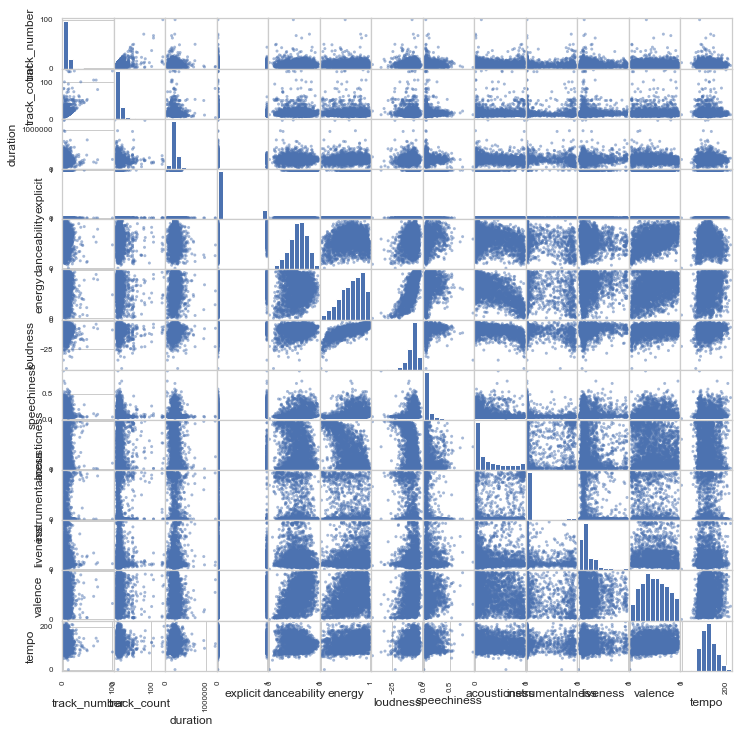

In [141]:
# Plot a scatter matrix to find the interdependencies of the predictors
# Only keep the predictors
scatter_df = X_train[predictors]

# Randomly select 10% of the dataset
scatter_df = scatter_df.sample(frac=0.1)

# Plot the scatter matrix
ax = scatter_matrix(scatter_df, figsize=(12, 12))
plt.show()

The scatter matrix shows positive correlations between:
- `energy` and `loudness`
- `track_count` and `track_number`

These relationships are weak, and expected. The researchers assume that "energetic" songs are also "loud", so it is intuitive that they would increase with each other. It is also clear that the more tracks there are on an album, the higher the average track number.

In [146]:
# Plot the individual predictors against the response
def spotify_scatter(data, predictor, response):
    sns.scatterplot(x=predictor, y=response, data=data)

    plt.title(f"Plot of {predictor} vs. the Response Variable, {response}")
    plt.show()

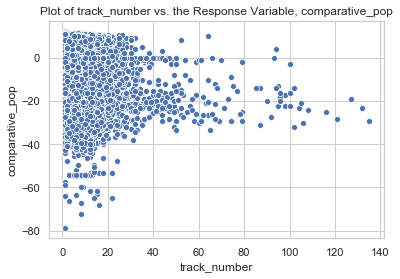

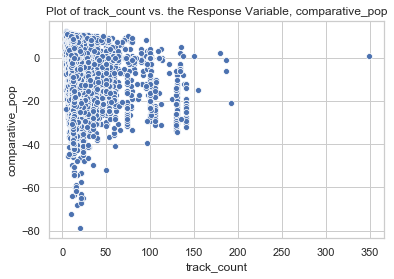

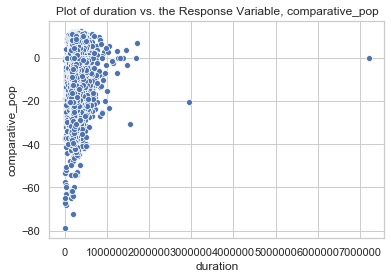

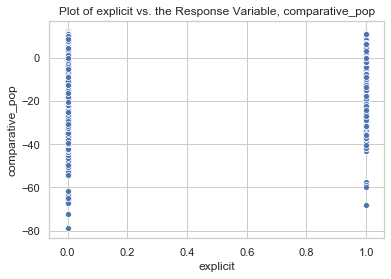

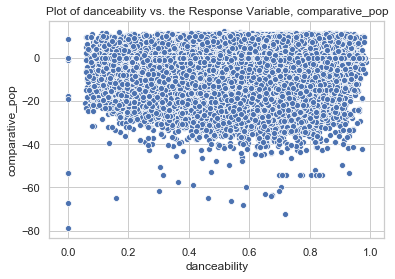

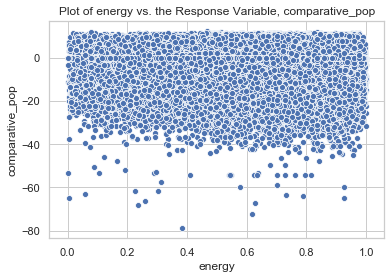

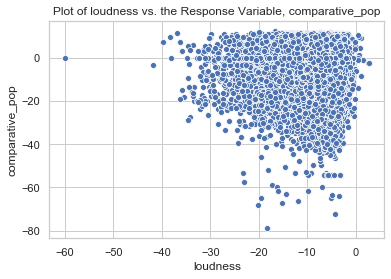

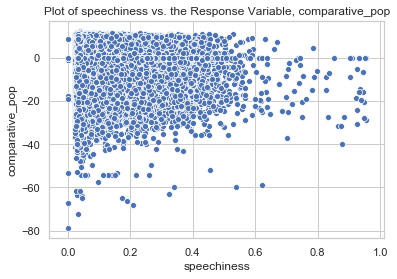

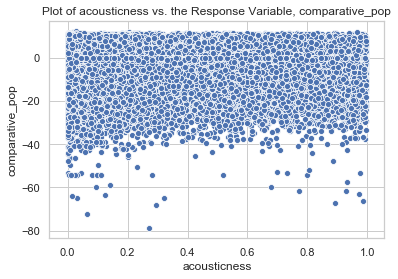

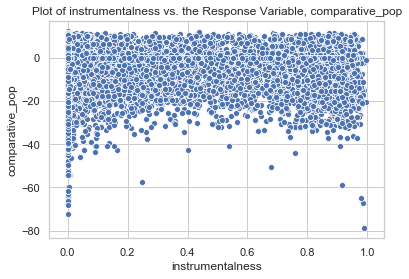

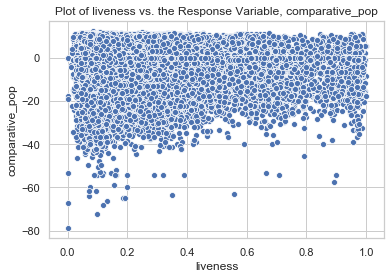

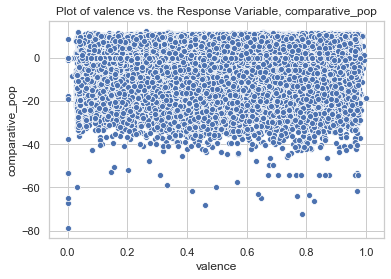

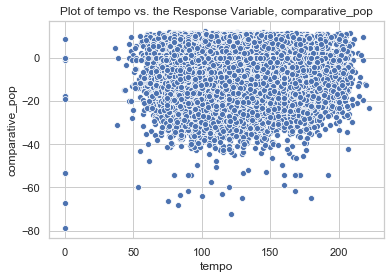

In [148]:
for predictor in predictors:
    spotify_scatter(data, predictor, response)